## chap11. 時系列データ

2023-11-10 ~ 11-11  

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2023, 11, 10, 17, 53, 27, 108409)

In [4]:
now.year, now.month, now.day

(2023, 11, 10)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [8]:
from datetime import timedelta

In [9]:
start = datetime(2011, 1, 7)

In [10]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

11.1.1 文字列と datetime の変換


In [12]:
stamp = datetime(2011, 1, 3)

In [13]:
str(stamp)

'2011-01-03 00:00:00'

In [14]:
datetime.now().strftime('%%%Y-%m-%d')

'%2023-11-10'

strptime は文字列を datetime オブジェクトに変換し、strftime は datetime オブジェクトを文字列に変換します。


In [15]:
value = '2011-01-03'

In [16]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
datestrs = ['7/6/2011', '8/6/2011']

In [18]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

さまざまな種類の日付表現をパースできるメソッド  
pandas.to_datetime()


In [19]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [20]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [21]:
idx =pd.to_datetime( datestrs+ [None])

In [22]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [23]:
idx[2]

NaT

In [24]:
pd.isna(idx)

array([False, False,  True])

### 11.2 時系列の基本


In [25]:
dates = [datetime(2011,1,2), datetime(2011,1, 5), 
         datetime(2011, 1, 7), datetime(2011, 1,8), 
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [26]:
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02   -0.308788
2011-01-05    1.830488
2011-01-07   -0.165337
2011-01-08    0.895827
2011-01-10   -0.313982
2011-01-12    0.244295
dtype: float64

In [27]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [28]:
ts + ts[::2]

2011-01-02   -0.617576
2011-01-05         NaN
2011-01-07   -0.330675
2011-01-08         NaN
2011-01-10   -0.627964
2011-01-12         NaN
dtype: float64

In [29]:
ts.index.dtype

dtype('<M8[ns]')

In [30]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

11.2.1 インデックス参照、データの選択、サブセットの抽出


In [31]:
stamp = ts.index[2]
ts[stamp]

-0.165337309137118

In [32]:
ts['2011-01-10']

-0.313981931969806

In [33]:
longer_ts = pd.Series(np.random.standard_normal(1000), 
                      index=pd.date_range('2000-01-01', periods=1000))
longer_ts

2000-01-01   -1.253226
2000-01-02   -0.431623
2000-01-03    0.133599
2000-01-04    1.478715
2000-01-05    0.169823
                ...   
2002-09-22    0.444676
2002-09-23    2.108576
2002-09-24    1.385821
2002-09-25    1.192462
2002-09-26   -0.363615
Freq: D, Length: 1000, dtype: float64

In [34]:
longer_ts['2001']

2001-01-01   -0.305362
2001-01-02   -1.411531
2001-01-03   -1.872253
2001-01-04   -1.040346
2001-01-05    0.751736
                ...   
2001-12-27    0.775558
2001-12-28    1.039009
2001-12-29    2.030033
2001-12-30   -0.608918
2001-12-31    1.323975
Freq: D, Length: 365, dtype: float64

In [35]:
longer_ts['2001-05']

2001-05-01    1.304118
2001-05-02    0.768317
2001-05-03    0.380108
2001-05-04   -0.712454
2001-05-05    0.541482
2001-05-06    0.884048
2001-05-07   -1.242494
2001-05-08   -1.523914
2001-05-09   -0.175579
2001-05-10    0.062954
2001-05-11    0.254144
2001-05-12   -0.381886
2001-05-13   -1.934400
2001-05-14    0.578366
2001-05-15   -0.714195
2001-05-16   -0.102809
2001-05-17    1.549302
2001-05-18    0.358174
2001-05-19   -0.705720
2001-05-20   -0.333009
2001-05-21   -0.244133
2001-05-22    0.558884
2001-05-23   -0.432595
2001-05-24   -0.591549
2001-05-25   -0.448553
2001-05-26   -0.506216
2001-05-27   -0.981277
2001-05-28   -0.068701
2001-05-29   -0.590890
2001-05-30   -0.576396
2001-05-31    0.982672
Freq: D, dtype: float64

In [36]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.165337
2011-01-08    0.895827
2011-01-10   -0.313982
2011-01-12    0.244295
dtype: float64

In [37]:
ts[datetime(2011, 1, 7): datetime(2011,1, 10)]

2011-01-07   -0.165337
2011-01-08    0.895827
2011-01-10   -0.313982
dtype: float64

In [38]:
ts

2011-01-02   -0.308788
2011-01-05    1.830488
2011-01-07   -0.165337
2011-01-08    0.895827
2011-01-10   -0.313982
2011-01-12    0.244295
dtype: float64

In [39]:
ts['2011-01-06': '2011-01-11']

2011-01-07   -0.165337
2011-01-08    0.895827
2011-01-10   -0.313982
dtype: float64

In [40]:
ts.truncate(after='2011-01-09')

2011-01-02   -0.308788
2011-01-05    1.830488
2011-01-07   -0.165337
2011-01-08    0.895827
dtype: float64

In [41]:
dates = pd.date_range('2000-01-01', periods=100, freq='W-WED')

In [42]:
long_df = pd.DataFrame(np.random.standard_normal((100, 4)), 
                       index=dates, 
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [43]:
long_df.loc['2001-05']

,Colorado,Texas,New York,Ohio
2001-05-02,0.252732,-0.347472,0.813989,1.266544
2001-05-09,-0.434816,-0.594818,-0.325917,1.086599
2001-05-16,1.840315,-0.332565,-0.677644,-1.679816
2001-05-23,0.574045,1.185025,2.190446,-0.804199
2001-05-30,-0.478803,1.026242,-0.288734,-0.603754


11.2.2 重複したインデックスを持つ時系列


In [44]:
dates = pd.DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', 
                          '2000-01-02', '2000-01-03'])

In [45]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [46]:
dup_ts.index.is_unique

False

In [47]:
dup_ts['2000-01-03']

4

In [48]:
dup_ts['2000-01-02']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [49]:
grouped = dup_ts.groupby(level=0)

In [50]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [51]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### 11.3 日付範囲、頻度、シフト


In [52]:
ts

2011-01-02   -0.308788
2011-01-05    1.830488
2011-01-07   -0.165337
2011-01-08    0.895827
2011-01-10   -0.313982
2011-01-12    0.244295
dtype: float64

In [53]:
resampler = ts.resample('D')

In [54]:
resampler

In [55]:
resampler.count()

2011-01-02    1
2011-01-03    0
2011-01-04    0
2011-01-05    1
2011-01-06    0
2011-01-07    1
2011-01-08    1
2011-01-09    0
2011-01-10    1
2011-01-11    0
2011-01-12    1
Freq: D, dtype: int64

11.3.1 日付範囲の生成


In [56]:
index = pd.date_range('2012-04-12', '2012-06-01')
index

DatetimeIndex(['2012-04-12', '2012-04-13', '2012-04-14', '2012-04-15',
               '2012-04-16', '2012-04-17', '2012-04-18', '2012-04-19',
               '2012-04-20', '2012-04-21', '2012-04-22', '2012-04-23',
               '2012-04-24', '2012-04-25', '2012-04-26', '2012-04-27',
               '2012-04-28', '2012-04-29', '2012-04-30', '2012-05-01',
               '2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06', '2012-05-07', '2012-05-08', '2012-05-09',
               '2012-05-10', '2012-05-11', '2012-05-12', '2012-05-13',
               '2012-05-14', '2012-05-15', '2012-05-16', '2012-05-17',
               '2012-05-18', '2012-05-19', '2012-05-20', '2012-05-21',
               '2012-05-22', '2012-05-23', '2012-05-24', '2012-05-25',
               '2012-05-26', '2012-05-27', '2012-05-28', '2012-05-29',
               '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [59]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') #BM= business end of month

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [60]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [61]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

11.3.2 頻度と日付オフセット


In [62]:
from pandas.tseries.offsets import Hour, Minute

In [63]:
hour = Hour()
hour

<Hour>

In [64]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [65]:
pd.date_range('2000-01-01', '2000-01-03', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [66]:
Hour(2) + Minute(30)

<150 * Minutes>

In [67]:
pd.date_range('2000-01-01',periods=10, freq=('1h30min'))

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

11.3.2.1 毎月の指定した週の指定した曜日（WOM-）


In [70]:
monthly_dates = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
# week of month 毎月第3金曜日

In [71]:
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

11.3.3 データの前方と後方へのシフト


In [72]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range('2000-01-01', periods=4, freq='M'))

In [73]:
ts

2000-01-31   -1.299785
2000-02-29    0.196710
2000-03-31   -0.409044
2000-04-30    0.030648
Freq: M, dtype: float64

In [74]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.299785
2000-04-30    0.196710
Freq: M, dtype: float64

In [75]:
ts.shift(-2)

2000-01-31   -0.409044
2000-02-29    0.030648
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [76]:
ts.shift(2, freq='M')

2000-03-31   -1.299785
2000-04-30    0.196710
2000-05-31   -0.409044
2000-06-30    0.030648
Freq: M, dtype: float64

In [77]:
ts.shift(3, freq='D')

2000-02-03   -1.299785
2000-03-03    0.196710
2000-04-03   -0.409044
2000-05-03    0.030648
dtype: float64

In [78]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -1.299785
2000-02-29 01:30:00    0.196710
2000-03-31 01:30:00   -0.409044
2000-04-30 01:30:00    0.030648
dtype: float64

11.3.3.1 オフセットを指定して日付をシフトする


In [79]:
from pandas.tseries.offsets import Day, MonthEnd

In [80]:
now = datetime(2011, 11, 17)

In [82]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [83]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [84]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [85]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [86]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [88]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range('2000-01-15', periods=20, freq='4D'))
ts

2000-01-15    0.884159
2000-01-19    0.625952
2000-01-23    0.275102
2000-01-27   -0.989255
2000-01-31   -0.354495
2000-02-04   -0.969617
2000-02-08   -0.468530
2000-02-12    0.575081
2000-02-16   -1.317586
2000-02-20   -1.179232
2000-02-24    1.614603
2000-02-28    0.086917
2000-03-03   -1.552392
2000-03-07   -1.098831
2000-03-11    0.484184
2000-03-15    0.027372
2000-03-19   -0.575455
2000-03-23    1.285334
2000-03-27   -0.752620
2000-03-31   -1.086463
Freq: 4D, dtype: float64

In [89]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.088293
2000-02-29   -0.236909
2000-03-31   -0.408609
dtype: float64

In [90]:
ts.resample('M').mean()

2000-01-31    0.088293
2000-02-29   -0.236909
2000-03-31   -0.408609
Freq: M, dtype: float64

### 11.4 タイムゾーンを扱う


In [227]:
import pytz

In [92]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [93]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

11.4.1 タイムゾーンのローカライゼーションと変換


In [97]:
dates = pd.date_range('2012-03-09 09:30', periods=6)

In [98]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00   -1.321761
2012-03-10 09:30:00    0.776997
2012-03-11 09:30:00    0.248295
2012-03-12 09:30:00   -0.962628
2012-03-13 09:30:00    0.319065
2012-03-14 09:30:00    0.273985
Freq: D, dtype: float64

In [99]:
print(ts.index.tz)

None


In [100]:
pd.date_range('2012-03-09 09:30',periods=10, tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [101]:
ts

2012-03-09 09:30:00   -1.321761
2012-03-10 09:30:00    0.776997
2012-03-11 09:30:00    0.248295
2012-03-12 09:30:00   -0.962628
2012-03-13 09:30:00    0.319065
2012-03-14 09:30:00    0.273985
Freq: D, dtype: float64

In [102]:
ts_utc = ts.tz_localize('UTC')

In [103]:
ts_utc

2012-03-09 09:30:00+00:00   -1.321761
2012-03-10 09:30:00+00:00    0.776997
2012-03-11 09:30:00+00:00    0.248295
2012-03-12 09:30:00+00:00   -0.962628
2012-03-13 09:30:00+00:00    0.319065
2012-03-14 09:30:00+00:00    0.273985
Freq: D, dtype: float64

In [104]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [105]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.321761
2012-03-10 04:30:00-05:00    0.776997
2012-03-11 05:30:00-04:00    0.248295
2012-03-12 05:30:00-04:00   -0.962628
2012-03-13 05:30:00-04:00    0.319065
2012-03-14 05:30:00-04:00    0.273985
Freq: D, dtype: float64

In [107]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.321761
2012-03-10 14:30:00+00:00    0.776997
2012-03-11 13:30:00+00:00    0.248295
2012-03-12 13:30:00+00:00   -0.962628
2012-03-13 13:30:00+00:00    0.319065
2012-03-14 13:30:00+00:00    0.273985
dtype: float64

In [109]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.321761
2012-03-10 15:30:00+01:00    0.776997
2012-03-11 14:30:00+01:00    0.248295
2012-03-12 14:30:00+01:00   -0.962628
2012-03-13 14:30:00+01:00    0.319065
2012-03-14 14:30:00+01:00    0.273985
dtype: float64

In [110]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

11.4.2 タイムゾーン情報を考慮した（アウェイな）タイムスタンプオブジェクト


In [111]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [112]:
stamp_utc = stamp.tz_localize('UTC')

In [113]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [114]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [115]:
stamp_utc.value

1299902400000000000

In [116]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [118]:
stamp = pd.Timestamp('2012-03-11 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [119]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [120]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [121]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

11.4.3 異なるタイムゾーン同士の演算

異なるタイムゾーンを持つ2つの時系列の間で演算を行う場合、演算結果のタイムゾーンはUTCになる  
タイムゾーンにナイーブなデータとあうぇあなデータの間での演算はサポートされていないのでエラーが発生する

In [122]:
dates = pd.date_range('2012-03-07 09:30', periods=10, freq='B')
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-07 09:30:00    0.886014
2012-03-08 09:30:00   -0.482815
2012-03-09 09:30:00    0.029925
2012-03-12 09:30:00    0.619828
2012-03-13 09:30:00   -1.953362
2012-03-14 09:30:00    0.953134
2012-03-15 09:30:00   -0.537290
2012-03-16 09:30:00    0.976898
2012-03-19 09:30:00   -0.750832
2012-03-20 09:30:00    0.420022
Freq: B, dtype: float64

In [124]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 期間を使った算術演算

In [125]:
p =pd.Period('2011', freq='A-DEC')
p

Period('2011', 'A-DEC')

In [126]:
p + 5

Period('2016', 'A-DEC')

In [127]:
p-2

Period('2009', 'A-DEC')

In [129]:
pd.Period('2014', freq = 'A-DEC') - p

<3 * YearEnds: month=12>

In [130]:
periods = pd.period_range('2000-01-01', '2000-6-30', freq='M')
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [131]:
pd.Series(np.random.standard_normal(6), 
          index=periods)

2000-01    0.124182
2000-02    2.396402
2000-03   -0.320011
2000-04    0.563846
2000-05   -0.914926
2000-06   -0.127043
Freq: M, dtype: float64

In [132]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

11.5.1 期間頻度の変換

In [133]:
p = pd.Period('2011', freq='A-DEC')
p.asfreq('M', how='start')

Period('2011-01', 'M')

In [134]:
p.asfreq('M', how='end')

Period('2011-12', 'M')

In [135]:
p.asfreq('M')

Period('2011-12', 'M')

In [136]:
p = pd.Period('2011', freq='A-JUN')
p

Period('2011', 'A-JUN')

In [137]:
p.asfreq('M', how='start')

Period('2010-07', 'M')

In [138]:
p.asfreq('M', how='end')

Period('2011-06', 'M')

In [139]:
p = pd.Period('Aug-2011', 'M')
p.asfreq('A-JUN')

Period('2012', 'A-JUN')

In [142]:
periods = pd.period_range('2006', 2009, freq='A-DEC')
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

2006    1.162366
2007   -0.833882
2008    1.229800
2009    0.586329
Freq: A-DEC, dtype: float64

In [143]:
ts.asfreq('M', how='start')

2006-01    1.162366
2007-01   -0.833882
2008-01    1.229800
2009-01    0.586329
Freq: M, dtype: float64

In [144]:
ts.asfreq('B', how='end')

C:\Users\sinis\AppData\Local\Temp\ipykernel_17532\3401117408.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq('B', how='end')


2006-12-29    1.162366
2007-12-31   -0.833882
2008-12-31    1.229800
2009-12-31    0.586329
Freq: B, dtype: float64

11.5.2 四半期の頻度

In [145]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [146]:
p.asfreq('D',how='start')

Period('2011-11-01', 'D')

In [147]:
p.asfreq('D',how='end')

Period('2012-01-31', 'D')

In [148]:
p4pm = (p.asfreq('B', how='end')-1).asfreq('T', how='start') + 16 *60

C:\Users\sinis\AppData\Local\Temp\ipykernel_17532\3757329119.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq('B', how='end')-1).asfreq('T', how='start') + 16 *60


In [149]:
p4pm

Period('2012-01-30 16:00', 'T')

In [150]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [151]:
periods = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [152]:
new_periods = (periods.asfreq('B', 'end')-1).asfreq('H','start') + 16
ts.index = new_periods.to_timestamp()

C:\Users\sinis\AppData\Local\Temp\ipykernel_17532\404298342.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq('B', 'end')-1).asfreq('H','start') + 16


In [153]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

11.5.3 タイムスタンプから期間への変換（とその逆）

In [154]:
dates = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts

2000-01-31    0.101745
2000-02-29    0.659689
2000-03-31   -0.000732
Freq: M, dtype: float64

In [155]:
pts = ts.to_period()
pts

2000-01    0.101745
2000-02    0.659689
2000-03   -0.000732
Freq: M, dtype: float64

In [156]:
dates = pd.date_range('2000-01-29', periods=6)
dates

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [157]:
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2

2000-01-29   -1.520770
2000-01-30    0.231055
2000-01-31    1.068928
2000-02-01   -0.802441
2000-02-02   -1.200944
2000-02-03   -0.940553
Freq: D, dtype: float64

In [158]:
ts2.to_period('M')

2000-01   -1.520770
2000-01    0.231055
2000-01    1.068928
2000-02   -0.802441
2000-02   -1.200944
2000-02   -0.940553
Freq: M, dtype: float64

In [159]:
pts = ts2.to_period()

In [160]:
pts

2000-01-29   -1.520770
2000-01-30    0.231055
2000-01-31    1.068928
2000-02-01   -0.802441
2000-02-02   -1.200944
2000-02-03   -0.940553
Freq: D, dtype: float64

In [162]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -1.520770
2000-01-30 23:59:59.999999999    0.231055
2000-01-31 23:59:59.999999999    1.068928
2000-02-01 23:59:59.999999999   -0.802441
2000-02-02 23:59:59.999999999   -1.200944
2000-02-03 23:59:59.999999999   -0.940553
Freq: D, dtype: float64

11.5.4 配列からPeriodIndexを作成する

In [163]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [164]:
data['year']

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [165]:
data['quarter']

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [166]:
index = pd.PeriodIndex(year=data['year'], quarter = data['quarter'], freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [167]:
data.index = index
data['infl']

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

### 11.6 再サンプリングと頻度変換

In [170]:
dates = pd.date_range('2000-01-01', periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01    0.815911
2000-01-02    0.127363
2000-01-03    0.531916
2000-01-04    0.568137
2000-01-05    0.146897
                ...   
2000-04-05   -0.353069
2000-04-06   -0.809815
2000-04-07   -0.282164
2000-04-08    0.844622
2000-04-09   -3.256001
Freq: D, Length: 100, dtype: float64

In [171]:
ts.resample('M').mean()

2000-01-31    0.129375
2000-02-29   -0.381259
2000-03-31    0.075476
2000-04-30   -0.482474
Freq: M, dtype: float64

In [172]:
ts.resample('M', kind='period').mean()

2000-01    0.129375
2000-02   -0.381259
2000-03    0.075476
2000-04   -0.482474
Freq: M, dtype: float64

11.6.1 ダウンサンプリング

In [174]:
dates = pd.date_range('2000-01-01', periods = 12, freq='T')
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [175]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [177]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [178]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [179]:
from pandas.tseries.frequencies import to_offset

In [180]:
result = ts.resample('5min', closed='right', label='right').sum()
result.index = result.index + to_offset('-1s')
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

11.6.1.1 四本値(始値(o)、高値(h)、安値(l)、終値(c))の再サンプリング

In [181]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)

In [183]:
ts

2000-01-01 00:00:00    10
2000-01-01 00:01:00     8
2000-01-01 00:02:00     1
2000-01-01 00:03:00    11
2000-01-01 00:04:00     5
2000-01-01 00:05:00     6
2000-01-01 00:06:00     9
2000-01-01 00:07:00     0
2000-01-01 00:08:00     4
2000-01-01 00:09:00     3
2000-01-01 00:10:00     7
2000-01-01 00:11:00     2
Freq: T, dtype: int32

In [182]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,10,11,1,5
2000-01-01 00:05:00,6,9,0,3
2000-01-01 00:10:00,7,7,2,2


11.6.2 アップサンプリングと穴埋め

In [184]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)), 
                     index=pd.date_range('2000-01-01', periods=2, freq='W-WED'), 
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-12,0.200503,-0.671859,-0.308175,0.233308


In [185]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.200503,-0.671859,-0.308175,0.233308


In [186]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-06,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-07,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-08,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-09,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-10,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-11,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-12,0.200503,-0.671859,-0.308175,0.233308


In [187]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-06,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-07,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.200503,-0.671859,-0.308175,0.233308


In [188]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.228003,-0.215862,-1.015596,-0.954136
2000-01-13,0.200503,-0.671859,-0.308175,0.233308


11.6.3 期間で再サンプリングする

In [189]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)), 
                     index=pd.period_range('1-2000', '12-2001', freq='M'), 
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,2.413505,-1.149156,1.362853,-1.593645
2000-02,1.602169,-0.835563,0.068370,0.050705
2000-03,-0.025913,-0.381778,-0.489345,-1.073697
2000-04,1.193910,1.043667,1.404710,0.444169
2000-05,0.271949,2.026832,-0.691758,0.348974


In [190]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.398239,-0.129140,-0.128150,-0.205826
2001,-0.065590,0.063518,-0.041959,-0.209949


In [191]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.398239,-0.129140,-0.128150,-0.205826
2000Q2,0.398239,-0.129140,-0.128150,-0.205826
2000Q3,0.398239,-0.129140,-0.128150,-0.205826
2000Q4,0.398239,-0.129140,-0.128150,-0.205826
2001Q1,-0.065590,0.063518,-0.041959,-0.209949
2001Q2,-0.065590,0.063518,-0.041959,-0.209949
2001Q3,-0.065590,0.063518,-0.041959,-0.209949
2001Q4,-0.065590,0.063518,-0.041959,-0.209949


In [192]:
annual_frame.resample('Q-DEC', convention='end').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.398239,-0.129140,-0.128150,-0.205826
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.065590,0.063518,-0.041959,-0.209949


In [193]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.398239,-0.129140,-0.128150,-0.205826
2001Q1,0.398239,-0.129140,-0.128150,-0.205826
2001Q2,0.398239,-0.129140,-0.128150,-0.205826
2001Q3,0.398239,-0.129140,-0.128150,-0.205826
2001Q4,-0.065590,0.063518,-0.041959,-0.209949
2002Q1,-0.065590,0.063518,-0.041959,-0.209949
2002Q2,-0.065590,0.063518,-0.041959,-0.209949
2002Q3,-0.065590,0.063518,-0.041959,-0.209949


11.6.4 時系列データの再サンプリングを伴うグループ化

In [194]:
N = 15
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)
df = pd.DataFrame({'time': times, 
                   'value': np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [195]:
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [197]:
df2 = pd.DataFrame({'time': times.repeat(3), 
                    'key': np.tile(['a', 'b', 'c'], N), 
                    'value': np.arange(N * 3)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0
1,2017-05-20 00:00:00,b,1
2,2017-05-20 00:00:00,c,2
3,2017-05-20 00:01:00,a,3
4,2017-05-20 00:01:00,b,4
5,2017-05-20 00:01:00,c,5
6,2017-05-20 00:02:00,a,6


In [198]:
time_key = pd.Grouper(freq='5min')

In [199]:
resamled = (df2.set_index('time').groupby(['key',time_key])).sum()
resamled

value
key time                      
a   2017-05-20 00:00:00     30
    2017-05-20 00:05:00    105
    2017-05-20 00:10:00    180
b   2017-05-20 00:00:00     35
    2017-05-20 00:05:00    110
    2017-05-20 00:10:00    185
c   2017-05-20 00:00:00     40
    2017-05-20 00:05:00    115
    2017-05-20 00:10:00    190

In [200]:
resamled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30
1,a,2017-05-20 00:05:00,105
2,a,2017-05-20 00:10:00,180
3,b,2017-05-20 00:00:00,35
4,b,2017-05-20 00:05:00,110
5,b,2017-05-20 00:10:00,185
6,c,2017-05-20 00:00:00,40
7,c,2017-05-20 00:05:00,115
8,c,2017-05-20 00:10:00,190


### 11.7 移動窓関数

In [201]:
close_px_all = pd.read_csv('examples/stock_px.csv', parse_dates=True, 
                           index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead


<Axes: >

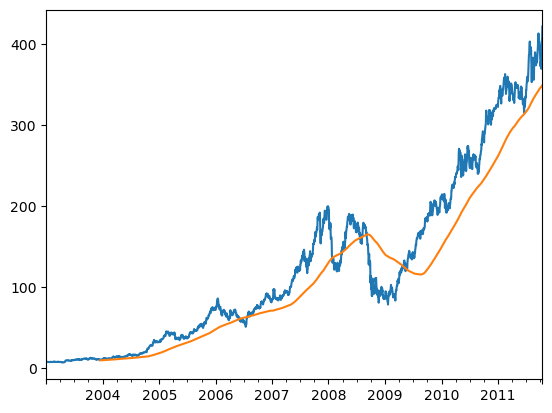

In [207]:
close_px['AAPL'].plot()
close_px['AAPL'].rolling(250).mean().plot()

In [208]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [209]:
std250 = close_px['AAPL'].pct_change().rolling(250, min_periods=10).std()
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead


<Axes: >

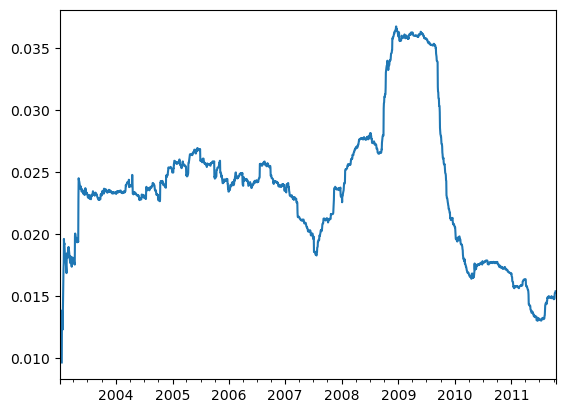

In [210]:
std250.plot()

In [211]:
expanding_mean = std250.expanding().mean()

c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq

<Axes: >

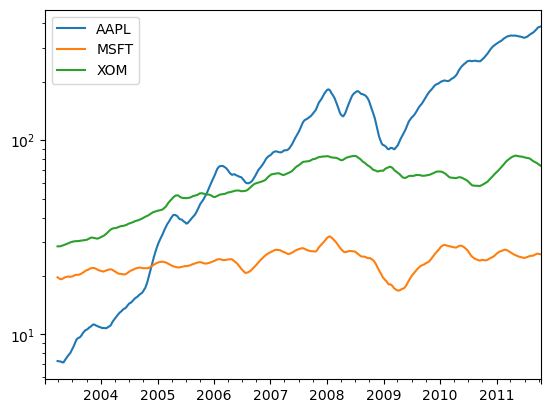

In [213]:
close_px.rolling(60).mean().plot(logy=True)

In [214]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


11.7.1 指数加重関数

In [215]:
aapl_px = close_px['AAPL']['2006': '2007']

In [216]:
ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead


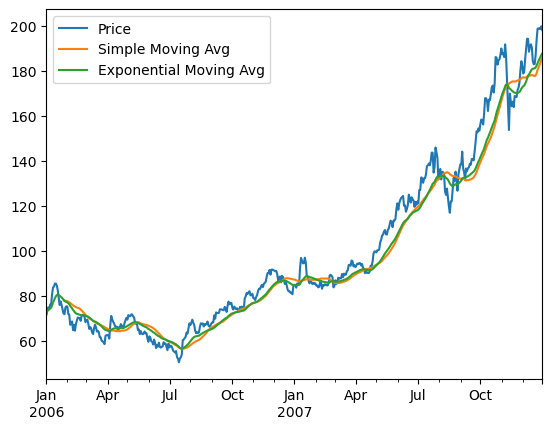

In [218]:
aapl_px.plot(label='Price')
ma30.plot(label='Simple Moving Avg')
ewma30.plot(label='Exponential Moving Avg')
plt.legend()

11.7.2 2つの時系列に対する移動窓関数

In [219]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead


<Axes: >

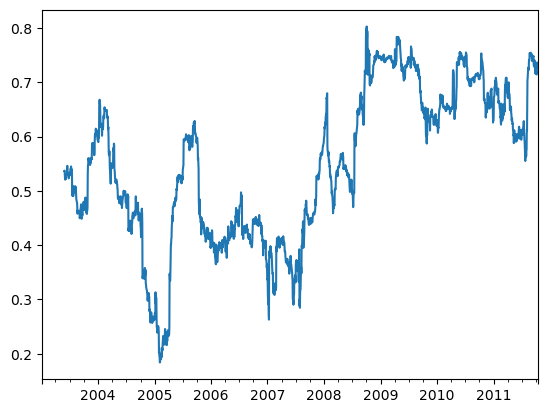

In [220]:
corr = returns['AAPL'].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq

<Axes: >

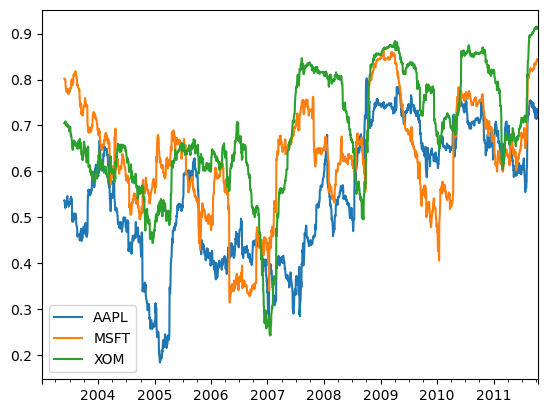

In [222]:
corr = returns.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

11.7.3 ユーザ定義の移動窓関数

In [223]:
from scipy.stats import percentileofscore

In [224]:
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

In [225]:
result = returns['AAPL'].rolling(250).apply(score_at_2percent)

c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\sinis\anaconda3\envs\pydata-book\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead


<Axes: >

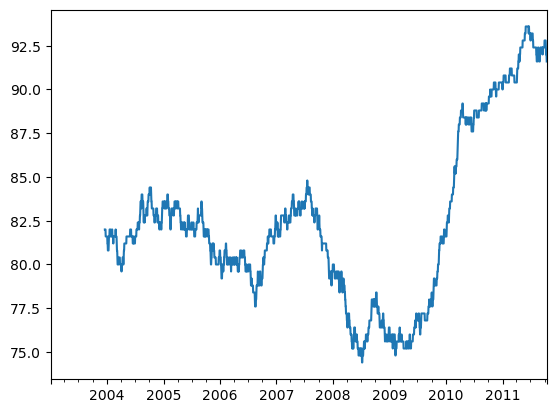

In [226]:
result.plot()